# 数据科学入门2.2 & 2.3：简单的分类 & 分类模型的选择

就像前面说过的，分类是属于一种监督学习方法，
他和回归类似。最大的区别就是他的输出是离散的有限的。
然后和回归不一样，我们以前讲回归目标是最小化MSE，
二分类则不是最小化MSE，而是最小化一个别的分类误差。
这个分类误差对于不同的模型会有些不一样，就像之前说的，
你不需要太清楚模型的原理，不过知道还是会有好处。
我们在讲一些具体的典型的模型的时候
会讲一下这些模型优化的目标是什么。

## 分类和最大似然估计

分类和回归不一样，他给出的是属于某个分类的概率。
之前讲logistics regression的时候讲过这个时候
要用最大似然估计。我们希望对于某个分类，
模型给出来的概率分布得到观测值的概率最大。

对于机器学习，我们一般是用最小化一个误差这种方法
来训练模型。对于观测值，它属于某个分类的情况只有0和1，
就是属于和不属于某一个分类。我们可以把每个样本看成一个
条件概率分布，我们希望我们的模型也和观测样本是同一个
条件概率分布，那么我们就可以用某一个函数来测量这两个分布
之间的距离，这两个分布之间的距离越小就说明他们越接近。
这个距离我们一般用cross-entropy这个函数来表示。
他是信息论里面一个概念，表示一种编码方式与这个信息本身
之间的差距，这里比较复杂我们就不多讲了。

## classifier的基本输出

回归的输出很简单就是一个数字，
代表预测的值，那么分类模型给出的这个东西属于哪一类，
是以什么形式给出来的呢？  

最终一个classifier输出的是，
这个sample属于哪一类。
但是模型直接的输出一般不是的。
一般来说有两种，首先是对于binary classifier
（只能把一个东西分为两类，比如是狗，不是狗）
来说，他输出的一般是一个标量，代表它属于某一类的概率，
如logistics regression里面他输出的是属于某一类的概率，
就如同下面这个公式，以前出现过的：

$$
\ln(\frac{P-Class1}{P-Class2})=B1+B(2:n)*X
$$

这个输出如果>0那么就是Class1，如果小于0就是Class2.

对于SVM这种来说也是类似，他输出的也是一个数字，
如果>0代表是一类，如果<0代表是另一类。

然后如果对于其他的可以输出多种类型的classifier来说，
他们输出的可能是这个sample属于各个类的概率，
如区分猫狗猪三类，他的输出可能是[0.1，0.1，0.8]。
这个就是one-hot编码类型的输出。
one-hot指的是标签的编码方式，
比如在上面的例子中一个sample，他的标签是猪，
那么他one-hot编码就是[0,0,1]。
各个模型输出的预测[0.1，0.1，0.8]
也表示模型认为这个sample最可能是猪，
因为最后一个值最大，可以看到全部加起来是1，
所以这个是以概率分布。
我们也用下面这个公式表示这个模型输出的分类

$$
class=argmax(\hat{Y})
$$

就是Y中最大值的位置 
$argmax([0.1，0.05，0.8，0.05])=2$ 
这种在分类的模型中，大家会经常看到。

## 分类模型的选择


如果你的数据较少尽量采用线性的模型和logistics 
regression。如果数据比较多可以使用knn和tree或者ensemble
的模型。如果你的散点图画出来感觉用一条直线，
或者曲线就可以比较干净的分开，就比较适合SVM的模型。

我们带式简单讲几个模型的原理，
对大家在机器学习的路上走得更远也是有帮助的：

### 多个分类是怎么实现的？

这个我之前讲过了，logistics regression是一种
binary classifier，他只能分成两类，SVM也是。
那多个分类怎么办呢？

这个时候有两种策略，一种是one-vs-rest（one-vs-all）。
就是加入要分3类，A、B、C。那么我就做3个classifier，
区分是A，不是A……这种。
三个分类其中哪个给出来的概率最高就用哪个结果，
比如他给出80%是A，20%是B，60%是C，那么最终结果就是A。

还有一种是one-vs-one的classifier。
就是我搞C(n,2)个classifier，（A，B），（A，C）（B，C）。
这种然后他们比较，最多的赢。如果前两个都说是A，第3个是B，
那么结果就是A。

两种有什么区别呢？首先第一种，存在一个问题，
就是当种类比较多的时候，
一个类的数据相比其他类型的数据可能要少很多，
例如ABCDEF，6类，每种都是10个样本，A是10个，非A有50个，
这样数据不平衡会影响模型的准确性。

如果是第二种的话，没有前面的问题，但是模型数量会增多，
可能会增加计算量，但也不一定哈，
因为每个模型输入的数据也少了。

### logistic regression

之前讲过这个，这个是用的最大似然估计。
分类器不是最小化的MSE，logistics regression是最大化
likelihood。什么是likelihood呢？这么理解，
样本是一个概率分布产生的，我们的模型是一个概率分布 
$P_\theta$ ，调整这个概率分布的参数 $\theta$，
使得模型的概率分布产生我们观测样本的概率最大。

$$
\hat{\theta}=L(X|\theta)=\sum_{i=1}^{n}logP(x_i|\theta)
$$

就是要找到一个 $\theta$ 让 $L(X|\theta)$ 
（likelihood function）最大。
大家记住这个原理后面各种机器学习基本都用到这个原理。

这个Logistic regression，是一个比较general的模型，
类似于线性模型（你看本文第一个公式）。
所以他是个size比较小的问题，
就是feature和sample都不大的数据，
最好feature是continuous得数据。

### SVM，Support Vector Machine，支持向量机

SVM就是在样本中找到一个点、一个直线、一个面、
或者是超平面（高于3维）
在样本的特征空间中把样本分成两类。
为什么要叫SVM呢？因为哪个超平面不是由样本决定的，
是由一组support vector（SV）决定的。
这些样本就是最难区分的，处于边界上的点。
SVM就是要让这个超平面到这些SV的距离最大。
如果这个问题是可分的，可以找到无数个平面把样本分开，
SVM找的是最优的，就是最大化到那个平面最近的点的距离。

![](2020-03-04-19-54-20.png)

对于不可分的问题SVM可以通过kernel函数把样本转换到高维
度的空间中，如下面这个例子：

![](2020-03-04-19-58-10.png)

上面这两类在1维空间上就找不到一个点把他分开，
这个时候我们加一个维度y轴=x^2，这样如下图，
我们就可以把这些点分开了：

![](2020-03-04-19-59-55.png)

SVM是一个比较万金油的分类模型，
对于各种数据都还比较好用。它属于一个low bias 的模型，
拟合呢往里比较高，非线性比较高，
尤其是使用某些高阶的kernal。
所以要注意也会存在容易过拟合的问题。
他比较适合的是feature size比较大的情况。

SVM的超参数有kernel的类型，
不同的kernel可能会有自己的超参数，
然后还有个Regularisation，
用来设置模型对误差的容忍度，
因为不会找到一个完美的平面把样本分开，
肯定会有一些错误是被允许的，
这个越高模型拟合训练数据的越好，但是容易过拟合。

### K-nearest neighbors

这个模型直接就能输出多个类型，
不是binary的classifier。
它是基于距离的一种分类器。
和他的名字一样，一个未知的样本，
他与哪个距离近就属于什么类型。
K是找到离他最近的k个样本。就是这个样本周围，
什么类型的点多那这个样本就是什么类型的。

具体的，先计算未知样本于一直样本是有点的距离，
然后按照距离排序，选出最近的K个，
这K个里面哪种类型的多那么这个点就是这个类型的。

![](2020-03-04-20-16-37.png)

可以看到K值会直接影响结果，k=3的话，
这个未知点是紫色类，k=6的话他是黄色类。
KNN的超参数有K，还有距离的算法，还有距离加权，
比如距离比较远的点，他的vote要少一些，
只能算半个点之类的。如上图，虽然有几个黄的，
但是他好远，所以权重小，结果可能还是紫的。

KNN还可以用来做回归，
就是把这K个点的标签求平均就是回归的值。

### Decision Tree，ensemble of tree

这个好简单，就是根据一个特征，用它的范围把样本分类，
比如>10是A类，5-10之间是B，小于5是C，
然后再增加一个特征再分。就如同下图：

![](2020-03-04-20-24-29.png)

可以看到这个树很大，很详细。
如果不加限制一个树可以把每个样本都分出来，
这显然是过拟合了，所以要限制一个树的调价节点的个数和深度。决策数有树的深度、叶子节点、最分裂节点样本数数等等的很多各种各样的超参数。

然后还有一种叫做ensemble的玩法，
就是建立很多很多很小的树，每个都会输出一个分类，
然后通过加权投票决定最后的分类，具体的就在这里就不多讲了。下面是random forest得示意图，大家大概感受一下他的概念

![](2020-04-02-22-53-19.png)

## 一个总的原则

上面提到了一些选择模型的原则，实际上，并不绝对，
有个比较可靠的方法就是SVM一般比较厉害，
很多时候都不错，但是对于样本特征都少，
又是continuous类型特征的话，logistic regression也可以。不过这些一般不是绝对的

但是最好的办法就是把各种模型都跑一边，看看哪个最好。

这里讲一个简单的例子告诉大家怎么完成一个分类模型的建立：

>exp9 有一种类型的花叫iris，他有3中主要的类型：
Versicolor，Setosa，Virginica，通过4个图特征，
如下面的图可以将它们分开，做个模型试试吧。  
![](2020-03-03-12-53-03.png)  
![](2020-03-03-12-55-55.png)  


In [1]:
import pandas as pd

iris = pd.read_csv('exp9.csv')
iris.drop(columns=['Id'], inplace=True)  
# 把‘Id’这列去掉，inplace=True表示操作替换原变量


C:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
from altair import *
Chart(iris).mark_point().encode(x='SepalLengthCm',y='PetalLengthCm', color='Species')
# 这里同样是因为Matplotlib实现起来比较麻烦所以用了这个

alt.Chart(...)

可以看到我们选了两个特征画散点图，
为什么只有两个呢？因为我2维的图看得比较清楚，
3维的就看的不那么直观了，
再比3维高得我们就没有办法画出来了。
我们的数据有4个特征，我们只能选择2个画在一个平面上，
看到有一个奇葩已经和另外两类分开了。

每个样本有4个特征，用一个4维的向量表示，
向量所在的一个空间就是我们数据的特征空间。
一般来说分类就是在这个空间中把这些点区分开。
我们选两个特征画散点图就是从一个方向对这个特征
进行投影，我们再换两个特征试试：

In [5]:
Chart(iris).mark_point().encode(x='SepalLengthCm', y='PetalWidthCm', color='Species')

alt.Chart(...)

可以看到这回3个基本上都分开了。好我们训练一下看看： 

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

models = dict()  # 建立一个字典用来存模型，键是模型名，值是模型

models['SVM'] = SVC(kernel='rbf')  # SVM这里我们搞个最常用的
models['KNeighbor'] = KNeighborsClassifier(n_neighbors=5)  # n_neighbors表示neighbor个数
models['RandomForest'] = RandomForestClassifier(n_estimators=100)  # n_estimators表示树的个数

# train test split用来分割训练集和测试集
# 训练集顾名思义就是用来训练模型的数据
# 测试集一般是用来测试模型性能的数据，比较接近真实应用中的分布
# 要注意模型在训练过程中一定没有见过测试集的任何信息
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], iris.iloc[:, -1], 
test_size=.5, random_state=0)

In [6]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, plot_confusion_matrix
from matplotlib import pyplot as plt
import numpy as np


def plot_cm(model, y_true, y_pred, name=None):
    """画混淆矩阵
    :param model: 分类模型
    :param y_true: 标签实际值
    :param y_pred: 标签预测值
    :param name: 模型名称
    """
    _, ax = plt.subplots()
    if name is not None:
        ax.set_title(name)
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax)
    plt.show()
    return None


def plot_cm_ratio(model, y_true, y_pred, name=None):
    """画混淆矩阵（按占各类型比例）
    :param model: 分类模型
    :param y_true: 标签实际值
    :param y_pred: 标签预测值
    :param name: 模型名称
    """
    _, ax = plt.subplots()
    if name is not None:
        ax.set_title(name)
    cm = confusion_matrix(y_true, y_pred)
    cm_ratio = np.zeros(cm.shape)
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            cm_ratio[i, j] = cm[i, j] / cm[i].sum()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_ratio, display_labels=model.classes_)
    disp.plot(ax=ax)
    plt.show()
    return None


def model_perf(model, y_true, y_pred, name=None):
    """返回模型分类准确率，tpr，fpr
    """
    if name is not None:
        print('For model {}: \n'.format(name))
    cm = confusion_matrix(y_true, y_pred)
    for i in range(len(model.classes_)):
        tp = cm[i, i]
        fp = cm[:, i].sum() - cm[i, i]
        fn = cm[i, :].sum() - cm[i, i]
        tn = cm.sum() - tp - fp - fn
        tpr = tp / (tp + fn)
        fpr = fp / (tn + fp)
        acc = (tp + tn) / cm.sum()
        print('For class {}: \n TPR is {}; \n FPR is {}; \n ACC is {}. \n'
        .format(model.classes_[i], tpr, fpr, acc))
    return None


def ovo_eval(model, name=None):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    plot_cm(model, y_test, prediction, name)
    plot_cm_ratio(model, y_test, prediction, name)
    model_perf(model, y_test, prediction, name)
    print('Overall Accuracy: {}'.format(model.score(X_test, y_test)))

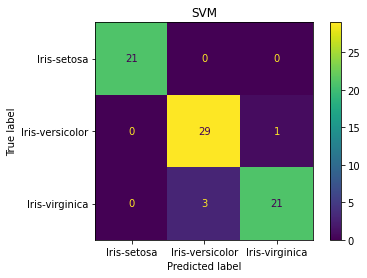

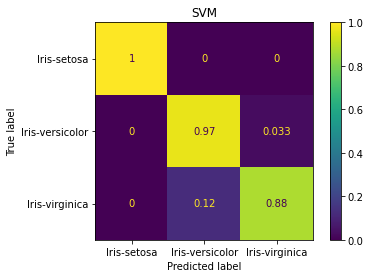

For model SVM: 

For class Iris-setosa: 
 TPR is 1.0; 
 FPR is 0.0; 
 ACC is 1.0. 

For class Iris-versicolor: 
 TPR is 0.9666666666666667; 
 FPR is 0.06666666666666667; 
 ACC is 0.9466666666666667. 

For class Iris-virginica: 
 TPR is 0.875; 
 FPR is 0.0196078431372549; 
 ACC is 0.9466666666666667. 

Overall Accuracy: 0.9466666666666667


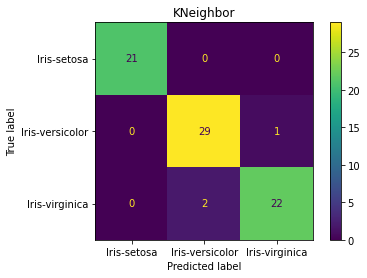

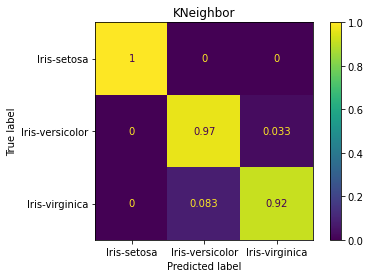

For model KNeighbor: 

For class Iris-setosa: 
 TPR is 1.0; 
 FPR is 0.0; 
 ACC is 1.0. 

For class Iris-versicolor: 
 TPR is 0.9666666666666667; 
 FPR is 0.044444444444444446; 
 ACC is 0.96. 

For class Iris-virginica: 
 TPR is 0.9166666666666666; 
 FPR is 0.0196078431372549; 
 ACC is 0.96. 

Overall Accuracy: 0.96


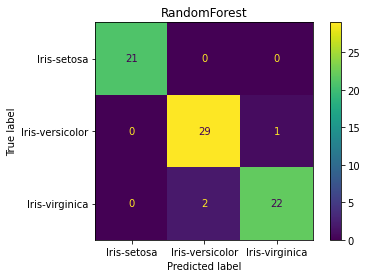

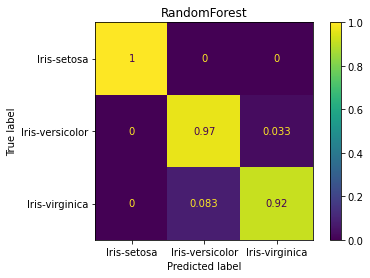

For model RandomForest: 

For class Iris-setosa: 
 TPR is 1.0; 
 FPR is 0.0; 
 ACC is 1.0. 

For class Iris-versicolor: 
 TPR is 0.9666666666666667; 
 FPR is 0.044444444444444446; 
 ACC is 0.96. 

For class Iris-virginica: 
 TPR is 0.9166666666666666; 
 FPR is 0.0196078431372549; 
 ACC is 0.96. 

Overall Accuracy: 0.96


In [9]:
for name, model in models.items():
    ovo_eval(model, name)